In [4]:
import numpy as np
import neurolab as nl
import pylab as pl
import matplotlib
matplotlib.style.use('ggplot')
fig_size = pl.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
pl.rcParams["figure.figsize"] = fig_size

In [5]:
centr = np.array([[0.2, 0.2], [0.4, 0.4], [0.7, 0.3], [0.2, 0.5]])
rand_norm = 0.05 * np.random.randn(100, 4, 2)
x = np.array([centr + r for r in rand_norm])
x.shape = (100 * 4, 2)
np.random.shuffle(x)


In [6]:
net = nl.net.newc([[0.0, 1.0],[0.0, 1.0]], 4)
error = net.train(x, epochs=200, show=20)

Epoch: 20; Error: 31.974789832911846;
Epoch: 40; Error: 31.10051337878478;
Epoch: 60; Error: 31.179977625009528;
Epoch: 80; Error: 31.184186926662154;
Epoch: 100; Error: 31.18497211655641;
Epoch: 120; Error: 31.185088219395602;
Epoch: 140; Error: 31.18510549171732;
Epoch: 160; Error: 31.18510807090779;
Epoch: 180; Error: 31.185108456536177;
Epoch: 200; Error: 31.18510851411383;
The maximum number of train epochs is reached


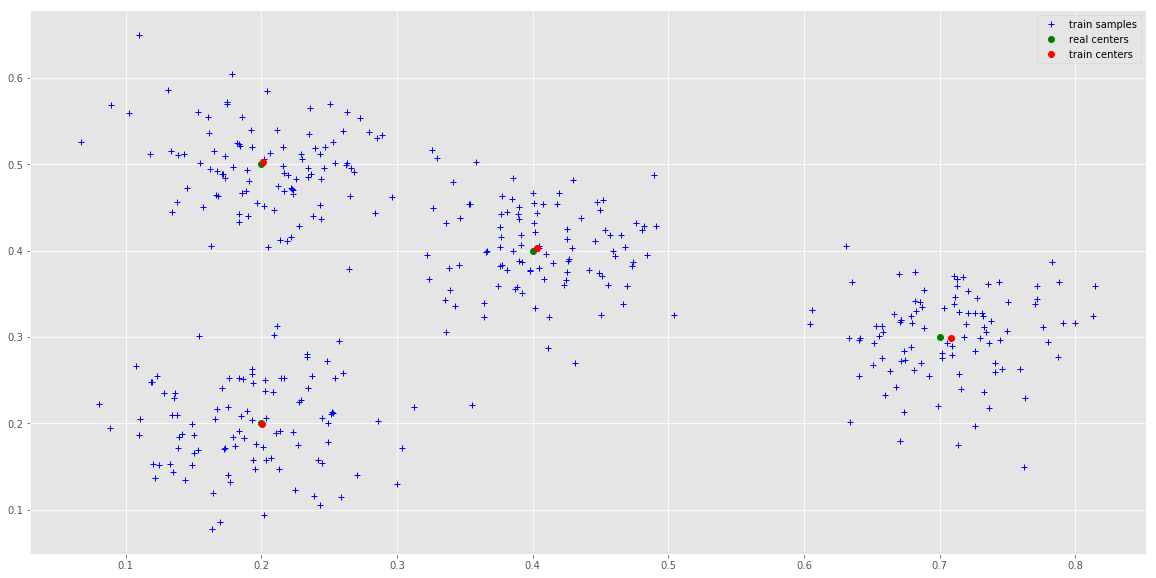

In [7]:
w = net.layers[0].np['w']
pl.plot(x[:,0], x[:,1], 'b+', centr[:,0], centr[:, 1], 'go', w[:,0], w[:,1], 'ro')
pl.legend(['train samples', 'real centers', 'train centers'])
pl.show()

In [9]:
#Вариант 14. Кластеризация (сеть Кохонена)
#Создайте и обучите ИНС, которая находит центры четырех кластеров множества точек 2-мерного пространства:
#{(0.5, 2), (1, -0.8), (2, -2), (3.5, -2.2), (4.2, -1.2), (5.5, 1.6), (6, 2.7), (7, 3.9), (8.5, 4), (10, 4)}

In [12]:
x = np.array([[0.5, 2],[1, -0.8],[2, -2],[3.5, -2.2],[4.2, -1.2],[5.5, 1.6],[6, 2.7],[7, 3.9],[8.5, 4],[10, 4]])

In [16]:
net = nl.net.newc([[0.0, 10.0],[0.0, 10.0]], 4)
error = net.train(x, epochs=200, show=20) 

Epoch: 20; Error: 19.870459218329692;
Epoch: 40; Error: 14.808783101812296;
Epoch: 60; Error: 18.8580164508783;
Epoch: 80; Error: 18.378396247583698;
Epoch: 100; Error: 17.11027030103637;
Epoch: 120; Error: 16.927805568017213;
Epoch: 140; Error: 16.805353042821757;
Epoch: 160; Error: 16.7099333588364;
Epoch: 180; Error: 16.63355337855599;
Epoch: 200; Error: 16.57103562903051;
The maximum number of train epochs is reached


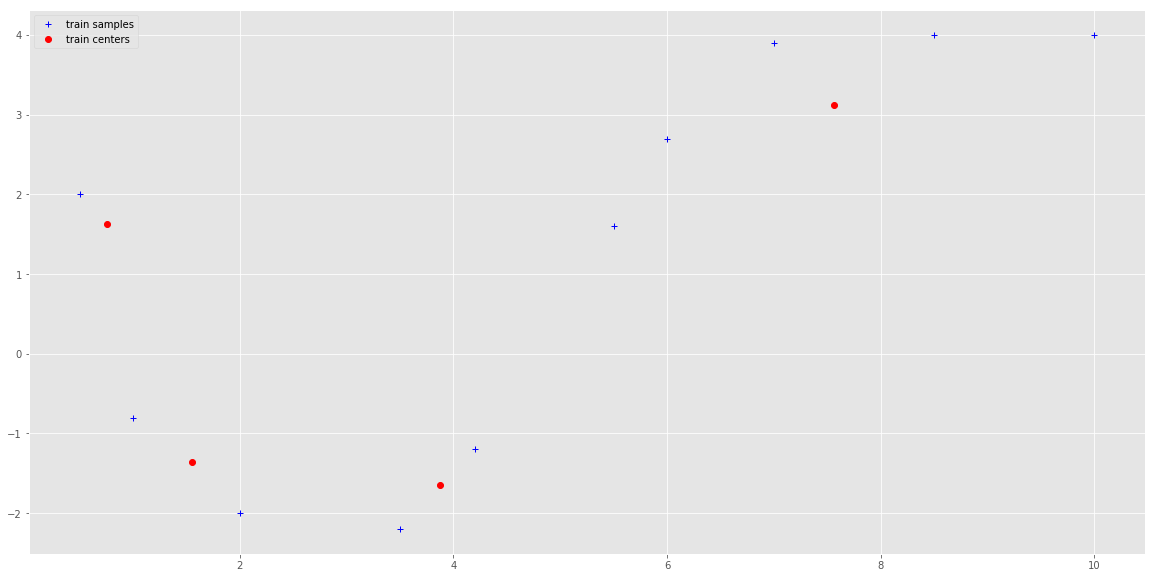

In [18]:
w = net.layers[0].np['w']
pl.plot(x[:,0], x[:,1], 'b+', w[:,0], w[:,1], 'ro')
pl.legend(['train samples', 'train centers'])
pl.show()

In [19]:
#сравним с другими алгоритмами кластреризации

In [20]:
from sklearn.cluster import MiniBatchKMeans
mbKMeans = MiniBatchKMeans(4)

In [23]:
mbKMeans.fit(x)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=4,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [24]:
mbKMeans.cluster_centers_

array([[ 3.13643123, -1.8527881 ],
       [ 6.17164179,  2.73992537],
       [ 9.23614776,  4.        ],
       [ 0.75910364,  0.54901961]])

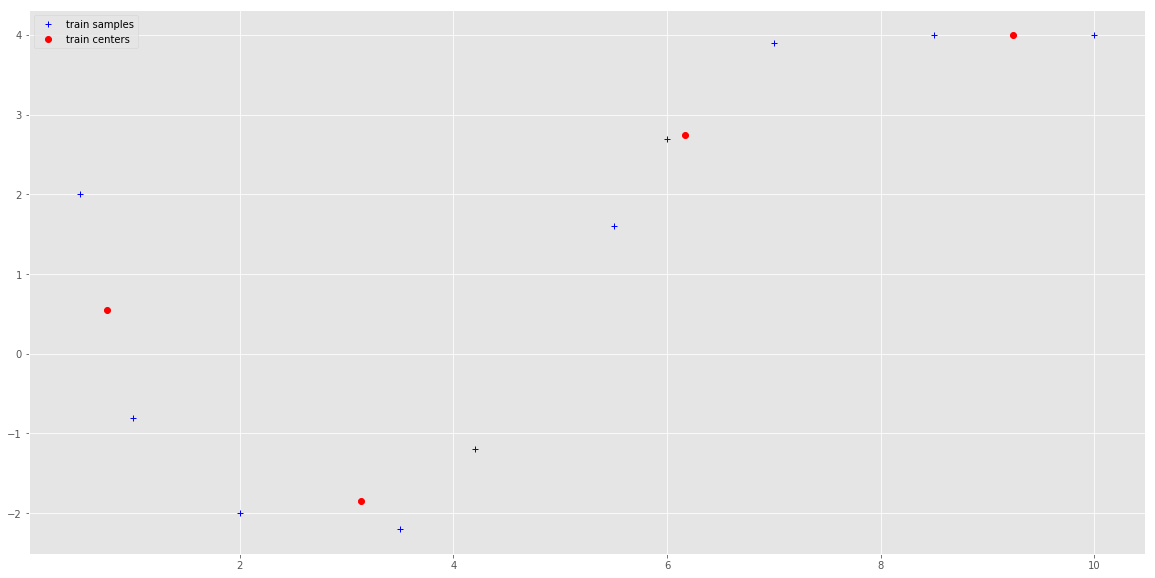

In [25]:

w = net.layers[0].np['w']
pl.plot(x[:,0], x[:,1], 'b+', mbKMeans.cluster_centers_[:,0], mbKMeans.cluster_centers_[:,1], 'ro')
pl.legend(['train samples', 'train centers'])
pl.show()

In [26]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)

In [27]:
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
km.cluster_centers_

array([[ 6.16666667,  2.73333333],
       [ 0.75      ,  0.6       ],
       [ 3.23333333, -1.8       ],
       [ 9.25      ,  4.        ]])

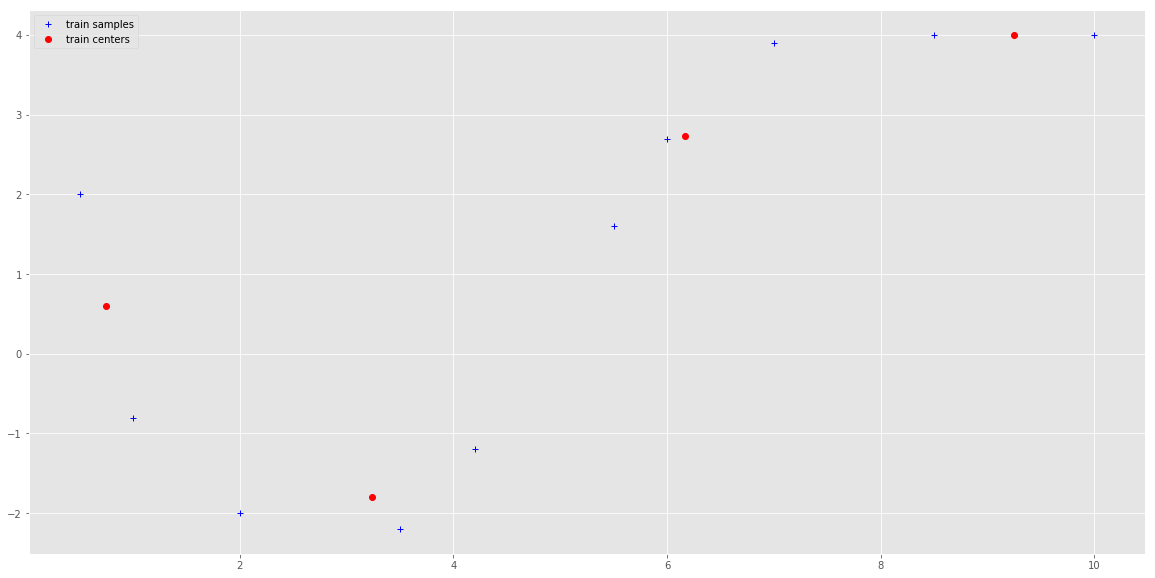

In [30]:
w = net.layers[0].np['w']
pl.plot(x[:,0], x[:,1], 'b+', km.cluster_centers_[:,0], km.cluster_centers_[:,1], 'ro')
pl.legend(['train samples', 'train centers'])
pl.show()